In [142]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_profiling as pp
import missingno as mno
from sklearn import linear_model
from prettytable import PrettyTable
import random
from missingpy import MissForest
from sklearn import tree
from math import floor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [144]:
df = pd.read_csv("wine.csv")

In [145]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [146]:
df.shape

(6497, 13)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [148]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [150]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

In [151]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### Data Modeling

In [152]:
#getting features 

x = df.drop('type', axis = 1)

# Getting Predicting Value
y = df['type']

In [153]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [154]:
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    lda.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    lda_pred = lda.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_lda = accuracy_score(yt, lda_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    
    # Getting F1 score
    f1_logisreg = f1_score(yt, logi_pred)
    f1_lda = f1_score(yt, lda_pred)
    f1_ganb = f1_score(yt, gnb_pred)
    f1_dtree = f1_score(yt, dtc_pred)
    f1_rf = f1_score(yt, rfc_pred)
    f1_svc = f1_score(yt, svm_pred)
    f1_knn = f1_score(yt, knn_pred)
    
    # MOdel Accuracy Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy_Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models.sort_values(by='Accuracy_Score', ascending=False))
    sns.barplot(x = models['Accuracy_Score'], y = models['Model'], palette='viridis');
    
    # MOdel F1 Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'F1_Score': [f1_logisreg, f1_lda, f1_ganb, f1_dtree, f1_rf, f1_svc, f1_knn]})

    print(models.sort_values(by='F1_Score', ascending=False))
    sns.barplot(x = models['F1_Score'], y = models['Model'], palette='viridis');

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.996616
4                 Random Forest        0.996616
3                 Decision Tree        0.984772
0           Logistic Regression        0.983080
2                   Naive Bayes        0.974619
6         K - Nearest Neighbors        0.959391
5       Support Vector Machines        0.952623
                          Model  F1_Score
4                 Random Forest  0.997758
1  Linear Discriminant Analysis  0.997753
3                 Decision Tree  0.989876
0           Logistic Regression  0.988764
2                   Naive Bayes  0.983012
6         K - Nearest Neighbors  0.973214
5       Support Vector Machines  0.969027


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


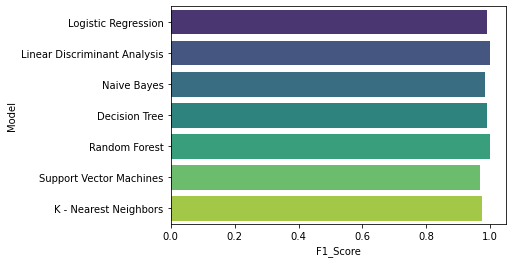

In [155]:
Classification_models(x_train, y_train, x_test, y_test)

### Using KNN imputer

## 1% imputataion

In [156]:
data_1 = df.copy()

In [157]:
data_1 = data_1.iloc[:,:12].mask(np.random.random(data_1.iloc[:,:12].shape) < .01)
data_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [158]:
data_1['type'] = df["type"]
df_one = data_1.copy()

In [159]:
df_knn = df_one.copy()
df_knn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [161]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

### DATA MODELING

In [162]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [163]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [164]:
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    lda.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    lda_pred = lda.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_lda = accuracy_score(yt, lda_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    
    # Getting F1 score
    f1_logisreg = f1_score(yt, logi_pred)
    f1_lda = f1_score(yt, lda_pred)
    f1_ganb = f1_score(yt, gnb_pred)
    f1_dtree = f1_score(yt, dtc_pred)
    f1_rf = f1_score(yt, rfc_pred)
    f1_svc = f1_score(yt, svm_pred)
    f1_knn = f1_score(yt, knn_pred)
    
    # MOdel Accuracy Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy_Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models.sort_values(by='Accuracy_Score', ascending=False))
    sns.barplot(x = models['Accuracy_Score'], y = models['Model'], palette='viridis');
    
    # MOdel F1 Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'F1_Score': [f1_logisreg, f1_lda, f1_ganb, f1_dtree, f1_rf, f1_svc, f1_knn]})

    print(models.sort_values(by='F1_Score', ascending=False))
    sns.barplot(x = models['F1_Score'], y = models['Model'], palette='viridis');

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.996616
4                 Random Forest        0.996616
0           Logistic Regression        0.983080
3                 Decision Tree        0.983080
2                   Naive Bayes        0.972927
6         K - Nearest Neighbors        0.957699
5       Support Vector Machines        0.954315
                          Model  F1_Score
4                 Random Forest  0.997758
1  Linear Discriminant Analysis  0.997753
0           Logistic Regression  0.988764
3                 Decision Tree  0.988739
2                   Naive Bayes  0.981859
6         K - Nearest Neighbors  0.972067
5       Support Vector Machines  0.970100


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


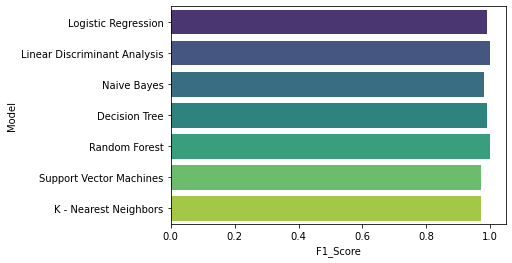

In [165]:
Classification_models(x_train, y_train, x_test, y_test)

### 5% Imputation

In [166]:
data_5 = df.copy()

In [167]:
data_5 = data_5.iloc[:,:12].mask(np.random.random(data_5.iloc[:,:12].shape) < .05)
data_5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,NaN,0.04,2.3,0.092,15.0,NaN,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,NaN,3.27,NaN,11.2,6.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [168]:
data_5['type'] = df["type"]
df_five = data_5.copy()

In [169]:
df_knn = df_five.copy()
df_knn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,NaN,0.04,2.3,0.092,15.0,NaN,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,NaN,3.27,NaN,11.2,6.0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [171]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [172]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [173]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [174]:
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    lda.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    lda_pred = lda.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_lda = accuracy_score(yt, lda_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    
    # Getting F1 score
    f1_logisreg = f1_score(yt, logi_pred)
    f1_lda = f1_score(yt, lda_pred)
    f1_ganb = f1_score(yt, gnb_pred)
    f1_dtree = f1_score(yt, dtc_pred)
    f1_rf = f1_score(yt, rfc_pred)
    f1_svc = f1_score(yt, svm_pred)
    f1_knn = f1_score(yt, knn_pred)
    
    # MOdel Accuracy Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy_Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models.sort_values(by='Accuracy_Score', ascending=False))
    sns.barplot(x = models['Accuracy_Score'], y = models['Model'], palette='viridis');
    
    # MOdel F1 Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'F1_Score': [f1_logisreg, f1_lda, f1_ganb, f1_dtree, f1_rf, f1_svc, f1_knn]})

    print(models.sort_values(by='F1_Score', ascending=False))
    sns.barplot(x = models['F1_Score'], y = models['Model'], palette='viridis');

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.998308
4                 Random Forest        0.996616
0           Logistic Regression        0.986464
3                 Decision Tree        0.984772
2                   Naive Bayes        0.976311
6         K - Nearest Neighbors        0.959391
5       Support Vector Machines        0.952623
                          Model  F1_Score
1  Linear Discriminant Analysis  0.998878
4                 Random Forest  0.997758
0           Logistic Regression  0.991011
3                 Decision Tree  0.989922
2                   Naive Bayes  0.984163
6         K - Nearest Neighbors  0.973392
5       Support Vector Machines  0.969027


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


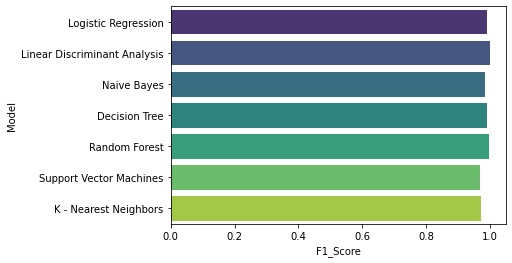

In [175]:
Classification_models(x_train, y_train, x_test, y_test)

### 10% Imputation

In [176]:
data_10 = df.copy()

In [177]:
data_10 = data_10.iloc[:,:12].mask(np.random.random(data_10.iloc[:,:12].shape) < .1)
data_10

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,NaN,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,NaN,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,NaN
3,11.2,0.28,0.56,1.9,NaN,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,NaN,0.70,0.00,1.9,NaN,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
6493,6.6,0.32,0.36,8.0,NaN,57.0,168.0,0.99490,3.15,0.46,NaN,5.0
6494,NaN,0.24,NaN,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,NaN


In [178]:
data_10['type'] = df["type"]
df_ten = data_10.copy()

In [179]:
df_knn = df_ten.copy()
df_knn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,NaN,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,NaN,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,NaN,0
3,11.2,0.28,0.56,1.9,NaN,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,NaN,0.70,0.00,1.9,NaN,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,1
6493,6.6,0.32,0.36,8.0,NaN,57.0,168.0,0.99490,3.15,0.46,NaN,5.0,1
6494,NaN,0.24,NaN,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,NaN,1


In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [181]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [182]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [183]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [184]:
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    lda.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    lda_pred = lda.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_lda = accuracy_score(yt, lda_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    
    # Getting F1 score
    f1_logisreg = f1_score(yt, logi_pred)
    f1_lda = f1_score(yt, lda_pred)
    f1_ganb = f1_score(yt, gnb_pred)
    f1_dtree = f1_score(yt, dtc_pred)
    f1_rf = f1_score(yt, rfc_pred)
    f1_svc = f1_score(yt, svm_pred)
    f1_knn = f1_score(yt, knn_pred)
    
    # MOdel Accuracy Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy_Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models.sort_values(by='Accuracy_Score', ascending=False))
    sns.barplot(x = models['Accuracy_Score'], y = models['Model'], palette='viridis');
    
    # MOdel F1 Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'F1_Score': [f1_logisreg, f1_lda, f1_ganb, f1_dtree, f1_rf, f1_svc, f1_knn]})

    print(models.sort_values(by='F1_Score', ascending=False))
    sns.barplot(x = models['F1_Score'], y = models['Model'], palette='viridis');

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.996616
4                 Random Forest        0.996616
0           Logistic Regression        0.986464
3                 Decision Tree        0.981387
2                   Naive Bayes        0.978003
5       Support Vector Machines        0.956007
6         K - Nearest Neighbors        0.956007
                          Model  F1_Score
1  Linear Discriminant Analysis  0.997758
4                 Random Forest  0.997758
0           Logistic Regression  0.991011
3                 Decision Tree  0.987709
2                   Naive Bayes  0.985244
5       Support Vector Machines  0.971111
6         K - Nearest Neighbors  0.970787


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


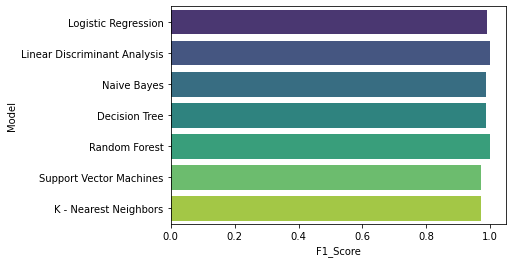

In [185]:
Classification_models(x_train, y_train, x_test, y_test)

### 20% imputation

In [186]:
data_20 = df.copy()

In [187]:
data_20 = data_20.iloc[:,:12].mask(np.random.random(data_20.iloc[:,:12].shape) < .2)
data_20

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,0.70,0.00,1.9,NaN,NaN,NaN,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,NaN,0.99700,3.26,NaN,9.8,5.0
3,11.2,0.28,0.56,1.9,NaN,17.0,NaN,0.99800,NaN,NaN,9.8,6.0
4,7.4,0.70,0.00,NaN,NaN,11.0,34.0,0.99780,3.51,NaN,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,NaN,0.99114,3.27,0.50,11.2,6.0
6493,NaN,0.32,0.36,8.0,NaN,57.0,168.0,0.99490,3.15,0.46,9.6,NaN
6494,NaN,NaN,NaN,1.2,NaN,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
6495,5.5,NaN,0.30,1.1,0.022,NaN,110.0,0.98869,3.34,0.38,12.8,7.0


In [188]:
data_20['type'] = df["type"]
df_twenty = data_20.copy()

In [189]:
df_knn = df_twenty.copy()
df_knn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,NaN,0.70,0.00,1.9,NaN,NaN,NaN,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,NaN,0.99700,3.26,NaN,9.8,5.0,0
3,11.2,0.28,0.56,1.9,NaN,17.0,NaN,0.99800,NaN,NaN,9.8,6.0,0
4,7.4,0.70,0.00,NaN,NaN,11.0,34.0,0.99780,3.51,NaN,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,NaN,0.99114,3.27,0.50,11.2,6.0,1
6493,NaN,0.32,0.36,8.0,NaN,57.0,168.0,0.99490,3.15,0.46,9.6,NaN,1
6494,NaN,NaN,NaN,1.2,NaN,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1
6495,5.5,NaN,0.30,1.1,0.022,NaN,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [191]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [192]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [193]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [194]:
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    lda.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    lda_pred = lda.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_lda = accuracy_score(yt, lda_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    
    # Getting F1 score
    f1_logisreg = f1_score(yt, logi_pred)
    f1_lda = f1_score(yt, lda_pred)
    f1_ganb = f1_score(yt, gnb_pred)
    f1_dtree = f1_score(yt, dtc_pred)
    f1_rf = f1_score(yt, rfc_pred)
    f1_svc = f1_score(yt, svm_pred)
    f1_knn = f1_score(yt, knn_pred)
    
    # MOdel Accuracy Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy_Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models.sort_values(by='Accuracy_Score', ascending=False))
    sns.barplot(x = models['Accuracy_Score'], y = models['Model'], palette='viridis');
    
    # MOdel F1 Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'F1_Score': [f1_logisreg, f1_lda, f1_ganb, f1_dtree, f1_rf, f1_svc, f1_knn]})

    print(models.sort_values(by='F1_Score', ascending=False))
    sns.barplot(x = models['F1_Score'], y = models['Model'], palette='viridis');

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.998308
4                 Random Forest        0.996616
0           Logistic Regression        0.989848
2                   Naive Bayes        0.984772
3                 Decision Tree        0.981387
6         K - Nearest Neighbors        0.957699
5       Support Vector Machines        0.950931
                          Model  F1_Score
1  Linear Discriminant Analysis  0.998878
4                 Random Forest  0.997758
0           Logistic Regression  0.993258
2                   Naive Bayes  0.989831
3                 Decision Tree  0.987599
6         K - Nearest Neighbors  0.972129
5       Support Vector Machines  0.967814


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


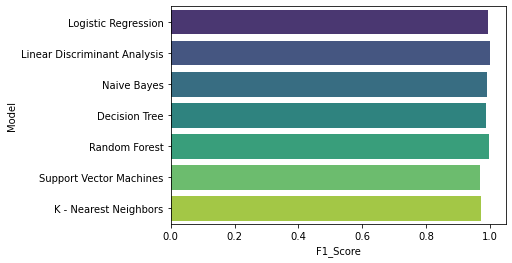

In [195]:
Classification_models(x_train, y_train, x_test, y_test)

### 50% imputation

In [196]:
data_50 = df.copy()

In [197]:
data_50 = data_50.iloc[:,:12].mask(np.random.random(data_50.iloc[:,:12].shape) < .5)
data_50

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,NaN,NaN,NaN,NaN,0.56,NaN,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,67.0,0.99680,NaN,0.68,9.8,NaN
2,NaN,NaN,NaN,2.3,NaN,15.0,54.0,0.99700,3.26,NaN,NaN,5.0
3,11.2,NaN,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,NaN,NaN
4,NaN,NaN,NaN,1.9,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,NaN,0.29,1.6,NaN,24.0,NaN,0.99114,NaN,NaN,11.2,NaN
6493,NaN,0.32,NaN,8.0,0.047,57.0,NaN,0.99490,NaN,NaN,NaN,5.0
6494,NaN,0.24,NaN,1.2,0.041,NaN,111.0,NaN,NaN,0.46,9.4,NaN
6495,NaN,0.29,0.30,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [198]:
data_50['type'] = df["type"]
df_fifty = data_50.copy()

In [199]:
df_knn = df_fifty.copy()
df_knn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,NaN,NaN,NaN,NaN,0.56,NaN,5.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,67.0,0.99680,NaN,0.68,9.8,NaN,0
2,NaN,NaN,NaN,2.3,NaN,15.0,54.0,0.99700,3.26,NaN,NaN,5.0,0
3,11.2,NaN,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,NaN,NaN,0
4,NaN,NaN,NaN,1.9,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,NaN,0.29,1.6,NaN,24.0,NaN,0.99114,NaN,NaN,11.2,NaN,1
6493,NaN,0.32,NaN,8.0,0.047,57.0,NaN,0.99490,NaN,NaN,NaN,5.0,1
6494,NaN,0.24,NaN,1.2,0.041,NaN,111.0,NaN,NaN,0.46,9.4,NaN,1
6495,NaN,0.29,0.30,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1


In [200]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [201]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [202]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [203]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        1.000000
0           Logistic Regression        0.998308
4                 Random Forest        0.998308
2                   Naive Bayes        0.996616
3                 Decision Tree        0.994924
5       Support Vector Machines        0.978003
6         K - Nearest Neighbors        0.972927
                          Model  F1_Score
1  Linear Discriminant Analysis  1.000000
0           Logistic Regression  0.998878
4                 Random Forest  0.998878
2                   Naive Bayes  0.997748
3                 Decision Tree  0.996633
5       Support Vector Machines  0.985442
6         K - Nearest Neighbors  0.982022


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


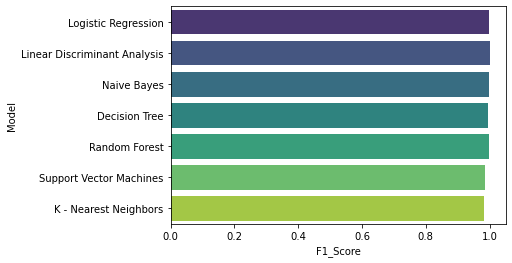

In [204]:
Classification_models(x_train, y_train, x_test, y_test)

### Using Decision Tree imputer

### 1% imputation

In [205]:
df_dt = df_one.copy()
df_dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [206]:
df_dt.isnull().sum()

fixed acidity           68
volatile acidity        68
citric acid             62
residual sugar          72
chlorides               68
free sulfur dioxide     85
total sulfur dioxide    75
density                 76
pH                      51
sulphates               67
alcohol                 66
quality                 62
type                     0
dtype: int64

In [207]:
#Standardize numerical Values
def standardize_col(col):
    return (col - col.min()) * 1.0 / (col.max() - col.min())

In [208]:
#order the columns of the dataframe according to decreasing number of null values, return list of column names
def ordered_cols(df):
  x = df.isna().sum()
  x = x.sort_values()
  x = x.to_frame()
  columns_sorted = x.index.values
  return list(columns_sorted)

In [209]:
class DecisionTree(object):
    """
    Class to create decision tree model (CART)
    """
    def __init__(self, _max_depth, _min_splits):
        self.max_depth = _max_depth
        self.min_splits = _min_splits

    def fit(self, _feature, _label):
        """
        :param _feature:
        :param _label:
        :return:
        """
        self.feature = _feature
        self.label = _label
        self.train_data = np.column_stack((self.feature,self.label))
        self.build_tree()


    def compute_gini_similarity(self, groups, class_labels):
        """
        compute the gini index for the groups and class labels
        :param groups:
        :param class_labels:
        :return:
        """
        num_sample = sum([len(group) for group in groups])
        gini_score = 0

        for group in groups:
            size = float(len(group))

            if size == 0:
                continue
            score = 0.0
            for label in class_labels:
                porportion = (group[:,-1] == label).sum() / size
                score += porportion * porportion
            gini_score += (1.0 - score) * (size/num_sample)

        return gini_score

    def terminal_node(self, _group):
        """
        Function set terminal node as the most common class in the group to make prediction later on
        is an helper function used to mark the leaf node in the tree based on the early stop condition
        or actual stop condition which ever is meet early
        :param _group:
        :return:
        """
        class_labels, count = np.unique(_group[:,-1], return_counts= True)
        return class_labels[np.argmax(count)]

    def split(self, index, val, data):
        """
        split features into two groups based on their values
        :param index:
        :param val:
        :param data:
        :return:
        """
        data_left = np.array([]).reshape(0,self.train_data.shape[1])
        data_right = np.array([]).reshape(0, self.train_data.shape[1])

        for row in data:
            if row[index] <= val :
                data_left = np.vstack((data_left,row))

            if row[index] > val:
                data_right = np.vstack((data_right, row))

        return data_left, data_right

    def best_split(self, data):
        """
        find the best split information using the gini score
        :param data:
        :return best_split result dict:
        """
        class_labels = np.unique(data[:,-1])
        best_index = 999
        best_val = 999
        best_score = 999
        best_groups = None

        for idx in range(data.shape[1]-1):
            for row in data:
                groups = self.split(idx, row[idx], data)
                gini_score = self.compute_gini_similarity(groups,class_labels)

                if gini_score < best_score:
                    best_index = idx
                    best_val = row[idx]
                    best_score = gini_score
                    best_groups = groups
        result = {}
        result['index'] = best_index
        result['val'] = best_val
        result['groups'] = best_groups
        return result


    def split_branch(self, node, depth):
        """
        recursively split the data and
        check for early stop argument based on self.max_depth and self.min_splits
        - check if left or right groups are empty is yess craete terminal node
        - check if we have reached max_depth early stop condition if yes create terminal node
        - Consider left node, check if the group is too small using min_split condition
            - if yes create terminal node
            - else continue to build the tree
        - same is done to the right side as well.
        else
        :param node:
        :param depth:
        :return:
        """
        left_node , right_node = node['groups']
        del(node['groups'])

        if not isinstance(left_node,np.ndarray) or not isinstance(right_node,np.ndarray):
            node['left'] = self.terminal_node(left_node + right_node)
            node['right'] = self.terminal_node(left_node + right_node)
            return

        if depth >= self.max_depth:
            node['left'] = self.terminal_node(left_node)
            node['right'] = self.terminal_node(right_node)
            return

        if len(left_node) <= self.min_splits:
            node['left'] = self.terminal_node(left_node)
        else:
            node['left'] = self.best_split(left_node)
            self.split_branch(node['left'],depth + 1)


        if len(right_node) <= self.min_splits:
            node['right'] = self.terminal_node(right_node)
        else:
            node['right'] = self.best_split(right_node)
            self.split_branch(node['right'],depth + 1)

    def build_tree(self):
        """
        build tree recursively with help of split_branch function
         - Create a root node
         - call recursive split_branch to build the complete tree
        :return:
        """
        self.root = self.best_split(self.train_data)
        self.split_branch(self.root, 1)
        return self.root

    def _predict(self, node, row):
        """
        Recursively traverse through the tress to determine the
        class of unseen sample data point during prediction
        :param node:
        :param row:
        :return:
        """
        if row[node['index']] < node['val']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']

        else:
            if isinstance(node['right'],dict):
                return self._predict(node['right'],row)
            else:
                return node['right']

    def predict(self, test_data):
        """
        predict the set of data point
        :param test_data:
        :return:
        """
        self.predicted_label = np.array([])
        for idx in test_data:
            self.predicted_label = np.append(self.predicted_label, self._predict(self.root,idx))

        return self.predicted_label

In [210]:
def impute(df):
  #initial imputed values
  
  Z = np.matrix(df['type']).reshape(-1,1)
  indexes_dict = {}
  
  #Get ordered list of col names except the session id which is always filled
  col_partial = ordered_cols(df.loc[:, df.columns != 'type'])
  col_list = col_partial
#   print(col_partial)
  
  
  for col in col_partial:
  #   print(col)
    y  = df[col]
  #   print(type(y))
    pos = list(y[y.isnull()].index)
  #   print(pos)
    indexes_dict[col] = pos

    X_train = np.delete(Z, pos, axis=0)
    X_test = Z[pos, :]
    y_train = np.matrix(y.drop(y.index[pos])).reshape(Z.shape[0]-len(pos),1)

    y_final = np.matrix(y).reshape(Z.shape[0],1)

  #   print(y.values.reshape(Z.shape[0],1)[pos[0]])
  #   X_test = Z.loc[pos].values#.reshape(1,-1)
  #   y_train = (y.drop(y.index[pos])).values(columns = 1)
  #   X_train = (Z.drop(Z.index[pos])).values
  #   X_train = (X_train).values#.reshape(-1,1)

    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, y_train)

    predicted = clf.predict(X_test)
  #   print(predicted)

    for i in range(len(pos)):
      ind = pos[i]
      y_final[ind] = predicted[i]

    Z = np.concatenate((Z,y_final),axis = 1)
  #   break
  
  #Converge 10 times
  for l in range(10):
    for colm in range(1,Z.shape[1]):
      column_name = col_partial[colm-1]
      pos = indexes_dict[column_name]

      X_train = np.delete(Z, colm, axis=1)
      X_train = np.delete(X_train, pos, axis=0)
      X_test = np.delete(Z[pos, :], colm, axis=1)
      y_train = Z[:, colm]
      y_train = np.delete(y_train, pos, axis=0)

  #     print(X_train.shape)
  #     print(X_test.shape)
  #     print(y_train.shape)

      clf = tree.DecisionTreeRegressor()
      clf = clf.fit(X_train, y_train)

      predicted = clf.predict(X_test)

      for i in range(len(pos)):
        ind = pos[i]
        Z[ind, colm] = predicted[i]
  
  col_list =  ['type'] + col_list
#   print(col_list)
  return pd.DataFrame(Z, columns=col_list)

In [211]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

type                    0
pH                      0
citric acid             0
quality                 0
alcohol                 0
sulphates               0
fixed acidity           0
volatile acidity        0
chlorides               0
residual sugar          0
total sulfur dioxide    0
density                 0
free sulfur dioxide     0
dtype: int64

### To get rmse value

In [81]:

# def plot_col(df):
#   col_cnt = 50
#   for col in df.columns:
#     if col != 'Outcome' :
#       print(col)
#     #   print(data_num_ordered[col].notnull())
#       obs_ind = list(np.where(df[col].notnull())[0])
# #       print(len(obs_ind))

#       x_values = []
#       y_values = []

#       data_copy = df
# #       print(df)
#       for i in range(floor(0.05*len(obs_ind))):
#         leave_ind = (random.choice(obs_ind))
#         x_values.append(data_copy[col][leave_ind])
#         data_copy[col][leave_ind] = np.nan

#         imputed = impute(df)
# #         print(type(imputed))
#         y_values.append(imputed[col][leave_ind])

# #         print(y_values)
#       rmse = mean_squared_error(x_values,y_values)
#       print("col: "+ str(col) + " rmse: "+ str(rmse) )
#       plt.figure()
#       plt.plot(x_values, x_values, 'r--', x_values, y_values, 'bo')
#       plt.xlabel('observed value')  
#       plt.ylabel('imputed value') 
#       plt.title(col)
#       plt.show()
      
#       col_cnt -=1
#       if col_cnt==0:
#         break

In [82]:
# plot_col(df_dt)

In [83]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [84]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.998308
4                 Random Forest        0.996616
0           Logistic Regression        0.984772
3                 Decision Tree        0.983080
2                   Naive Bayes        0.972927
6         K - Nearest Neighbors        0.961083
5       Support Vector Machines        0.952623
                          Model  F1_Score
1  Linear Discriminant Analysis  0.998878
4                 Random Forest  0.997758
0           Logistic Regression  0.989899
3                 Decision Tree  0.988739
2                   Naive Bayes  0.981859
6         K - Nearest Neighbors  0.974244
5       Support Vector Machines  0.969027


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


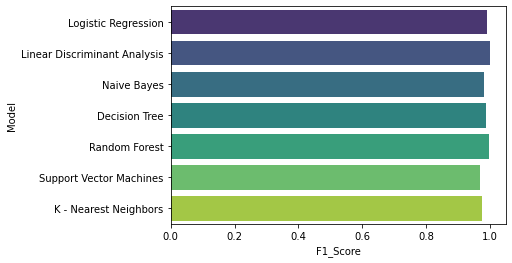

In [85]:
Classification_models(x_train, y_train, x_test, y_test)

### 5 % imputation

In [86]:
df_dt = df_five.copy()
df_dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,NaN,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,NaN,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,NaN,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,NaN,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,NaN,0.46,9.6,NaN,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,NaN,9.4,6.0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [87]:
df_dt.isnull().sum()

fixed acidity           349
volatile acidity        327
citric acid             333
residual sugar          330
chlorides               295
free sulfur dioxide     332
total sulfur dioxide    315
density                 311
pH                      326
sulphates               346
alcohol                 313
quality                 359
type                      0
dtype: int64

In [88]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

type                    0
chlorides               0
density                 0
alcohol                 0
total sulfur dioxide    0
pH                      0
volatile acidity        0
residual sugar          0
free sulfur dioxide     0
citric acid             0
sulphates               0
fixed acidity           0
quality                 0
dtype: int64

In [89]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [90]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
4                 Random Forest        0.996616
1  Linear Discriminant Analysis        0.994924
3                 Decision Tree        0.981387
0           Logistic Regression        0.979695
2                   Naive Bayes        0.974619
5       Support Vector Machines        0.949239
6         K - Nearest Neighbors        0.949239
                          Model  F1_Score
4                 Random Forest  0.997758
1  Linear Discriminant Analysis  0.996633
3                 Decision Tree  0.987654
0           Logistic Regression  0.986577
2                   Naive Bayes  0.983012
5       Support Vector Machines  0.966887
6         K - Nearest Neighbors  0.966443


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


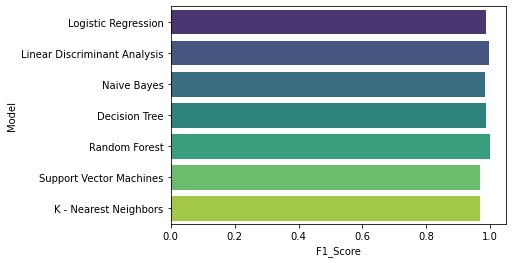

In [91]:
Classification_models(x_train, y_train, x_test, y_test)

### 10% imputation

In [92]:
df_dt = df_ten.copy()
df_dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,NaN,NaN,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,NaN,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,NaN,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,NaN,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,NaN,0.99780,3.51,NaN,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,NaN,92.0,0.99114,3.27,0.50,11.2,6.0,1
6493,6.6,0.32,0.36,NaN,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,1
6494,NaN,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,NaN,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [93]:
df_dt.isnull().sum()

fixed acidity           681
volatile acidity        705
citric acid             649
residual sugar          630
chlorides               702
free sulfur dioxide     655
total sulfur dioxide    658
density                 620
pH                      663
sulphates               665
alcohol                 632
quality                 654
type                      0
dtype: int64

In [94]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

type                    0
density                 0
residual sugar          0
alcohol                 0
citric acid             0
quality                 0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
fixed acidity           0
chlorides               0
volatile acidity        0
dtype: int64

In [95]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [96]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.996616
4                 Random Forest        0.994924
0           Logistic Regression        0.986464
3                 Decision Tree        0.984772
2                   Naive Bayes        0.972927
6         K - Nearest Neighbors        0.954315
5       Support Vector Machines        0.952623
                          Model  F1_Score
1  Linear Discriminant Analysis  0.997753
4                 Random Forest  0.996633
0           Logistic Regression  0.991031
3                 Decision Tree  0.989899
2                   Naive Bayes  0.981900
6         K - Nearest Neighbors  0.969765
5       Support Vector Machines  0.969027


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


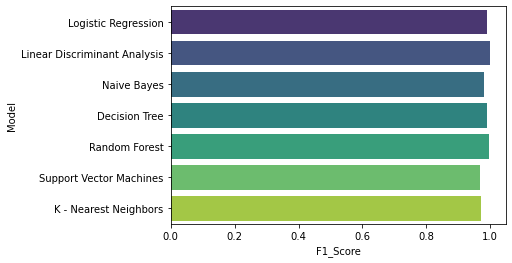

In [97]:
Classification_models(x_train, y_train, x_test, y_test)

### 20% imputation

In [98]:
df_dt = df_twenty.copy()
df_dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,NaN,0.70,0.00,1.9,0.076,11.0,34.0,NaN,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,NaN,0.098,25.0,67.0,NaN,NaN,0.68,9.8,5.0,0
2,NaN,0.76,0.04,2.3,0.092,15.0,NaN,NaN,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,NaN,0.21,0.29,1.6,0.039,24.0,NaN,0.99114,3.27,0.50,11.2,NaN,1
6493,NaN,0.32,0.36,NaN,0.047,57.0,NaN,NaN,3.15,NaN,9.6,5.0,1
6494,NaN,0.24,NaN,1.2,NaN,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1
6495,5.5,0.29,0.30,NaN,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [99]:
df_dt.isnull().sum()

fixed acidity           1311
volatile acidity        1286
citric acid             1237
residual sugar          1311
chlorides               1266
free sulfur dioxide     1365
total sulfur dioxide    1294
density                 1287
pH                      1379
sulphates               1296
alcohol                 1250
quality                 1277
type                       0
dtype: int64

In [100]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

type                    0
citric acid             0
alcohol                 0
chlorides               0
quality                 0
volatile acidity        0
density                 0
total sulfur dioxide    0
sulphates               0
fixed acidity           0
residual sugar          0
free sulfur dioxide     0
pH                      0
dtype: int64

In [101]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [102]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.994924
4                 Random Forest        0.994924
3                 Decision Tree        0.984772
0           Logistic Regression        0.979695
2                   Naive Bayes        0.969543
6         K - Nearest Neighbors        0.962775
5       Support Vector Machines        0.959391
                          Model  F1_Score
4                 Random Forest  0.996641
1  Linear Discriminant Analysis  0.996633
3                 Decision Tree  0.989922
0           Logistic Regression  0.986486
2                   Naive Bayes  0.979452
6         K - Nearest Neighbors  0.975336
5       Support Vector Machines  0.973392


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


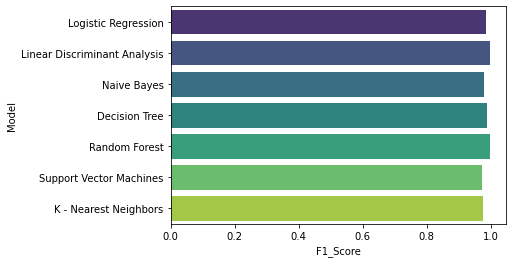

In [103]:
Classification_models(x_train, y_train, x_test, y_test)

### 50% imputation

In [104]:
df_dt = df_fifty.copy()
df_dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,NaN,NaN,NaN,1.9,0.076,11.0,NaN,0.99780,NaN,0.56,NaN,5.0,0
1,NaN,0.88,0.00,2.6,NaN,NaN,NaN,NaN,NaN,NaN,9.8,NaN,0
2,NaN,0.76,0.04,NaN,NaN,15.0,54.0,NaN,NaN,NaN,9.8,5.0,0
3,11.2,0.28,0.56,NaN,NaN,NaN,NaN,0.99800,NaN,0.58,9.8,6.0,0
4,NaN,0.70,NaN,1.9,0.076,NaN,NaN,0.99780,3.51,NaN,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,NaN,NaN,NaN,0.039,24.0,NaN,0.99114,NaN,NaN,11.2,NaN,1
6493,NaN,NaN,NaN,NaN,0.047,NaN,NaN,0.99490,NaN,NaN,NaN,5.0,1
6494,NaN,NaN,NaN,1.2,NaN,30.0,NaN,0.99254,2.99,0.46,9.4,6.0,1
6495,NaN,0.29,0.30,NaN,NaN,20.0,110.0,NaN,NaN,NaN,12.8,7.0,1


In [105]:
df_dt.isnull().sum()

fixed acidity           3267
volatile acidity        3231
citric acid             3233
residual sugar          3223
chlorides               3251
free sulfur dioxide     3220
total sulfur dioxide    3281
density                 3225
pH                      3242
sulphates               3308
alcohol                 3221
quality                 3248
type                       0
dtype: int64

In [106]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

type                    0
free sulfur dioxide     0
alcohol                 0
residual sugar          0
density                 0
volatile acidity        0
citric acid             0
pH                      0
quality                 0
chlorides               0
fixed acidity           0
total sulfur dioxide    0
sulphates               0
dtype: int64

In [107]:
#getting features 
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [108]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
4                 Random Forest        0.996616
1  Linear Discriminant Analysis        0.993232
3                 Decision Tree        0.981387
0           Logistic Regression        0.969543
2                   Naive Bayes        0.967851
6         K - Nearest Neighbors        0.945854
5       Support Vector Machines        0.942470
                          Model  F1_Score
4                 Random Forest  0.997753
1  Linear Discriminant Analysis  0.995506
3                 Decision Tree  0.987599
0           Logistic Regression  0.979730
2                   Naive Bayes  0.978335
6         K - Nearest Neighbors  0.964045
5       Support Vector Machines  0.962472


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


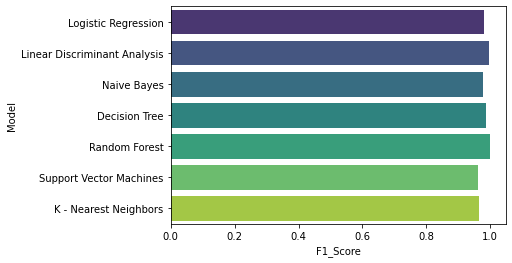

In [109]:
Classification_models(x_train, y_train, x_test, y_test)

### Using MissForest Imputation method

### 1% imputation

In [110]:
df_mf = df_one.copy()
df_mf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,NaN,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,NaN,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [111]:
df_mf.isnull().sum()

fixed acidity           76
volatile acidity        53
citric acid             67
residual sugar          75
chlorides               61
free sulfur dioxide     78
total sulfur dioxide    73
density                 68
pH                      54
sulphates               64
alcohol                 59
quality                 76
type                     0
dtype: int64

In [112]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [113]:
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [114]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.998308
4                 Random Forest        0.996616
3                 Decision Tree        0.986464
0           Logistic Regression        0.984772
2                   Naive Bayes        0.974619
6         K - Nearest Neighbors        0.959391
5       Support Vector Machines        0.952623
                          Model  F1_Score
1  Linear Discriminant Analysis  0.998878
4                 Random Forest  0.997758
3                 Decision Tree  0.991031
0           Logistic Regression  0.989899
2                   Naive Bayes  0.983012
6         K - Nearest Neighbors  0.973154
5       Support Vector Machines  0.969027


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


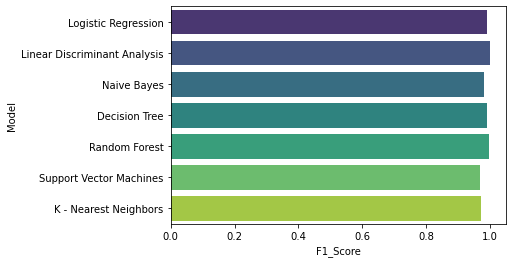

In [115]:
Classification_models(x_train, y_train, x_test, y_test)

### 5% imputation

In [116]:
df_mf = df_five.copy()
df_mf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,NaN,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,NaN,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,NaN,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,NaN,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,NaN,0.46,9.6,NaN,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,NaN,9.4,6.0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [117]:
df_mf.isnull().sum()

fixed acidity           349
volatile acidity        327
citric acid             333
residual sugar          330
chlorides               295
free sulfur dioxide     332
total sulfur dioxide    315
density                 311
pH                      326
sulphates               346
alcohol                 313
quality                 359
type                      0
dtype: int64

In [118]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 5


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [119]:
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [120]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.996616
4                 Random Forest        0.996616
0           Logistic Regression        0.981387
2                   Naive Bayes        0.978003
3                 Decision Tree        0.974619
6         K - Nearest Neighbors        0.957699
5       Support Vector Machines        0.952623
                          Model  F1_Score
4                 Random Forest  0.997758
1  Linear Discriminant Analysis  0.997753
0           Logistic Regression  0.987682
2                   Naive Bayes  0.985311
3                 Decision Tree  0.983127
6         K - Nearest Neighbors  0.972004
5       Support Vector Machines  0.969027


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


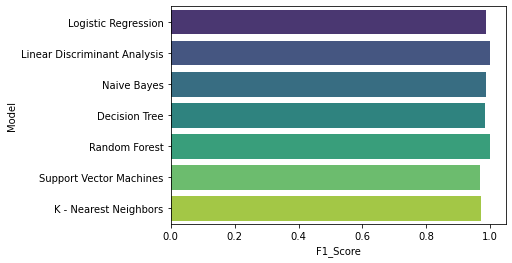

In [121]:
Classification_models(x_train, y_train, x_test, y_test)

### 10% imputation

In [122]:
df_mf = df_ten.copy()
df_mf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,NaN,NaN,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,NaN,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,NaN,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,NaN,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,NaN,0.99780,3.51,NaN,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,NaN,92.0,0.99114,3.27,0.50,11.2,6.0,1
6493,6.6,0.32,0.36,NaN,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,1
6494,NaN,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,NaN,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [123]:
df_mf.isnull().sum()

fixed acidity           681
volatile acidity        705
citric acid             649
residual sugar          630
chlorides               702
free sulfur dioxide     655
total sulfur dioxide    658
density                 620
pH                      663
sulphates               665
alcohol                 632
quality                 654
type                      0
dtype: int64

In [124]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [125]:
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [126]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.998308
4                 Random Forest        0.994924
0           Logistic Regression        0.984772
3                 Decision Tree        0.984772
2                   Naive Bayes        0.976311
5       Support Vector Machines        0.954315
6         K - Nearest Neighbors        0.952623
                          Model  F1_Score
1  Linear Discriminant Analysis  0.998878
4                 Random Forest  0.996633
0           Logistic Regression  0.989922
3                 Decision Tree  0.989922
2                   Naive Bayes  0.984163
5       Support Vector Machines  0.970166
6         K - Nearest Neighbors  0.968820


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


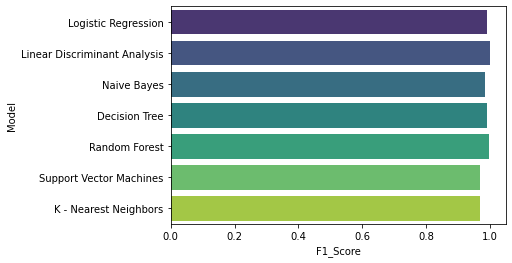

In [127]:
Classification_models(x_train, y_train, x_test, y_test)

### 20% imputation

In [128]:
df_mf = df_twenty.copy()
df_mf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,NaN,0.70,0.00,1.9,0.076,11.0,34.0,NaN,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,NaN,0.098,25.0,67.0,NaN,NaN,0.68,9.8,5.0,0
2,NaN,0.76,0.04,2.3,0.092,15.0,NaN,NaN,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,NaN,0.21,0.29,1.6,0.039,24.0,NaN,0.99114,3.27,0.50,11.2,NaN,1
6493,NaN,0.32,0.36,NaN,0.047,57.0,NaN,NaN,3.15,NaN,9.6,5.0,1
6494,NaN,0.24,NaN,1.2,NaN,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,1
6495,5.5,0.29,0.30,NaN,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1


In [129]:
df_mf.isnull().sum()

fixed acidity           1311
volatile acidity        1286
citric acid             1237
residual sugar          1311
chlorides               1266
free sulfur dioxide     1365
total sulfur dioxide    1294
density                 1287
pH                      1379
sulphates               1296
alcohol                 1250
quality                 1277
type                       0
dtype: int64

In [130]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 5


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 6


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 7


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [131]:
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [132]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        1.000000
4                 Random Forest        0.993232
3                 Decision Tree        0.989848
0           Logistic Regression        0.986464
2                   Naive Bayes        0.983080
6         K - Nearest Neighbors        0.964467
5       Support Vector Machines        0.952623
                          Model  F1_Score
1  Linear Discriminant Analysis  1.000000
4                 Random Forest  0.995516
3                 Decision Tree  0.993258
0           Logistic Regression  0.991011
2                   Naive Bayes  0.988636
6         K - Nearest Neighbors  0.976589
5       Support Vector Machines  0.969027


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


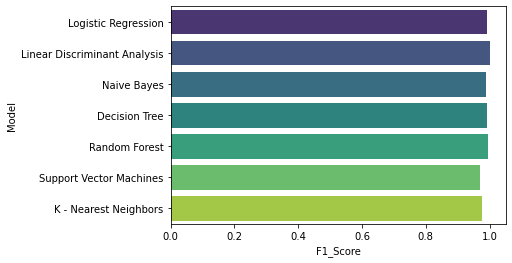

In [133]:
Classification_models(x_train, y_train, x_test, y_test)

### 50% imputation

In [134]:
df_mf = df_fifty.copy()
df_mf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,NaN,NaN,NaN,1.9,0.076,11.0,NaN,0.99780,NaN,0.56,NaN,5.0,0
1,NaN,0.88,0.00,2.6,NaN,NaN,NaN,NaN,NaN,NaN,9.8,NaN,0
2,NaN,0.76,0.04,NaN,NaN,15.0,54.0,NaN,NaN,NaN,9.8,5.0,0
3,11.2,0.28,0.56,NaN,NaN,NaN,NaN,0.99800,NaN,0.58,9.8,6.0,0
4,NaN,0.70,NaN,1.9,0.076,NaN,NaN,0.99780,3.51,NaN,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,NaN,NaN,NaN,0.039,24.0,NaN,0.99114,NaN,NaN,11.2,NaN,1
6493,NaN,NaN,NaN,NaN,0.047,NaN,NaN,0.99490,NaN,NaN,NaN,5.0,1
6494,NaN,NaN,NaN,1.2,NaN,30.0,NaN,0.99254,2.99,0.46,9.4,6.0,1
6495,NaN,0.29,0.30,NaN,NaN,20.0,110.0,NaN,NaN,NaN,12.8,7.0,1


In [135]:
df_mf.isnull().sum()

fixed acidity           3267
volatile acidity        3231
citric acid             3233
residual sugar          3223
chlorides               3251
free sulfur dioxide     3220
total sulfur dioxide    3281
density                 3225
pH                      3242
sulphates               3308
alcohol                 3221
quality                 3248
type                       0
dtype: int64

In [136]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 5


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 6


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 7


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 8


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 9


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [137]:
x = df_transform.drop('type', axis = 1)

# Getting Predicting Value
y = df_transform['type']

In [138]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
4                 Random Forest        0.998308
1  Linear Discriminant Analysis        0.996616
0           Logistic Regression        0.991540
3                 Decision Tree        0.988156
2                   Naive Bayes        0.981387
6         K - Nearest Neighbors        0.969543
5       Support Vector Machines        0.956007
                          Model  F1_Score
4                 Random Forest  0.998875
1  Linear Discriminant Analysis  0.997753
0           Logistic Regression  0.994376
3                 Decision Tree  0.992108
2                   Naive Bayes  0.987514
6         K - Nearest Neighbors  0.979866
5       Support Vector Machines  0.970917


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


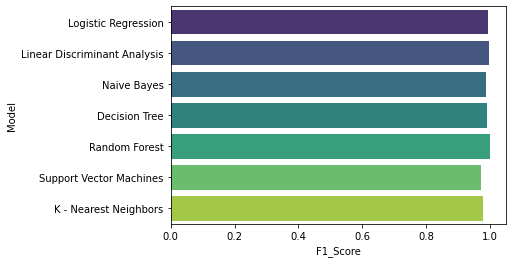

In [139]:
Classification_models(x_train, y_train, x_test, y_test)